# Run subset by (time) point operation

**Rooki** calls climate data operations on the **rook** processing service.

In [1]:
import os
os.environ['ROOK_URL'] = 'http://rook.dkrz.de/wps'

from rooki import rooki

**parameters of subset operation**

In [2]:
rooki.subset?

Signature:
rooki.subset(
    collection,
    pre_checked=False,
    apply_fixes=True,
    original_files=False,
    time=None,
    time_components=None,
    area=None,
    level=None,
)
Docstring:
Run subsetting on climate model data. Calls daops operators.

Parameters
----------
collection : string
    A dataset identifier or list of comma separated identifiersExample: c3s-cmip5.output1.ICHEC.EC-EARTH.historical.day.atmos.day.r1i1p1.tas.latest
time : string
    The time interval (start/end) to subset over separated by '/' or a list of time points separated by ','. The format is according to the ISO-8601 standard. Example: 1860-01-01/1900-12-30 or 1860-01-01, 1870-01-01, 1880-01-01
time_components : string
    Optional time components to describe parts of the time period (e.g. year, month and day). Example: month:01,02,03 or year:1970,1980|month:01,02,03
area : string
    The area to subset over as 4 comma separated values.Example: 0.,49.,10.,65
level : string
    The level range to su

## subset by time interval

In [3]:
resp = rooki.subset(
    collection='c3s-cmip6.ScenarioMIP.INM.INM-CM5-0.ssp245.r1i1p1f1.day.tas.gr1.v20190619',
    time='2016-01-01/2016-12-30',
)
resp.ok

True

In [4]:
ds = resp.datasets()[0]
ds

<xarray.Dataset> Size: 31MB
Dimensions:    (time: 364, bnds: 2, lat: 120, lon: 180)
Coordinates:
  * time       (time) object 3kB 2016-01-01 12:00:00 ... 2016-12-30 12:00:00
  * lat        (lat) float64 960B -89.25 -87.75 -86.25 ... 86.25 87.75 89.25
  * lon        (lon) float64 1kB 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 6kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    tas        (time, lat, lon) float32 31MB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    branch_time_in_parent:  60225.0
    contact:                Evgeny Volodin (volodinev@gmail.com)
    ...                     ...
    title:                  INM-CM5-0 output prepared for CMIP6
    tracking_id:            hdl:21.14100/89cab4a2-c867-4bb5-a215-622f969cd844
    variable_id:            tas
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by Lawrence Livermore P...
    cmor_version:           3.4.0

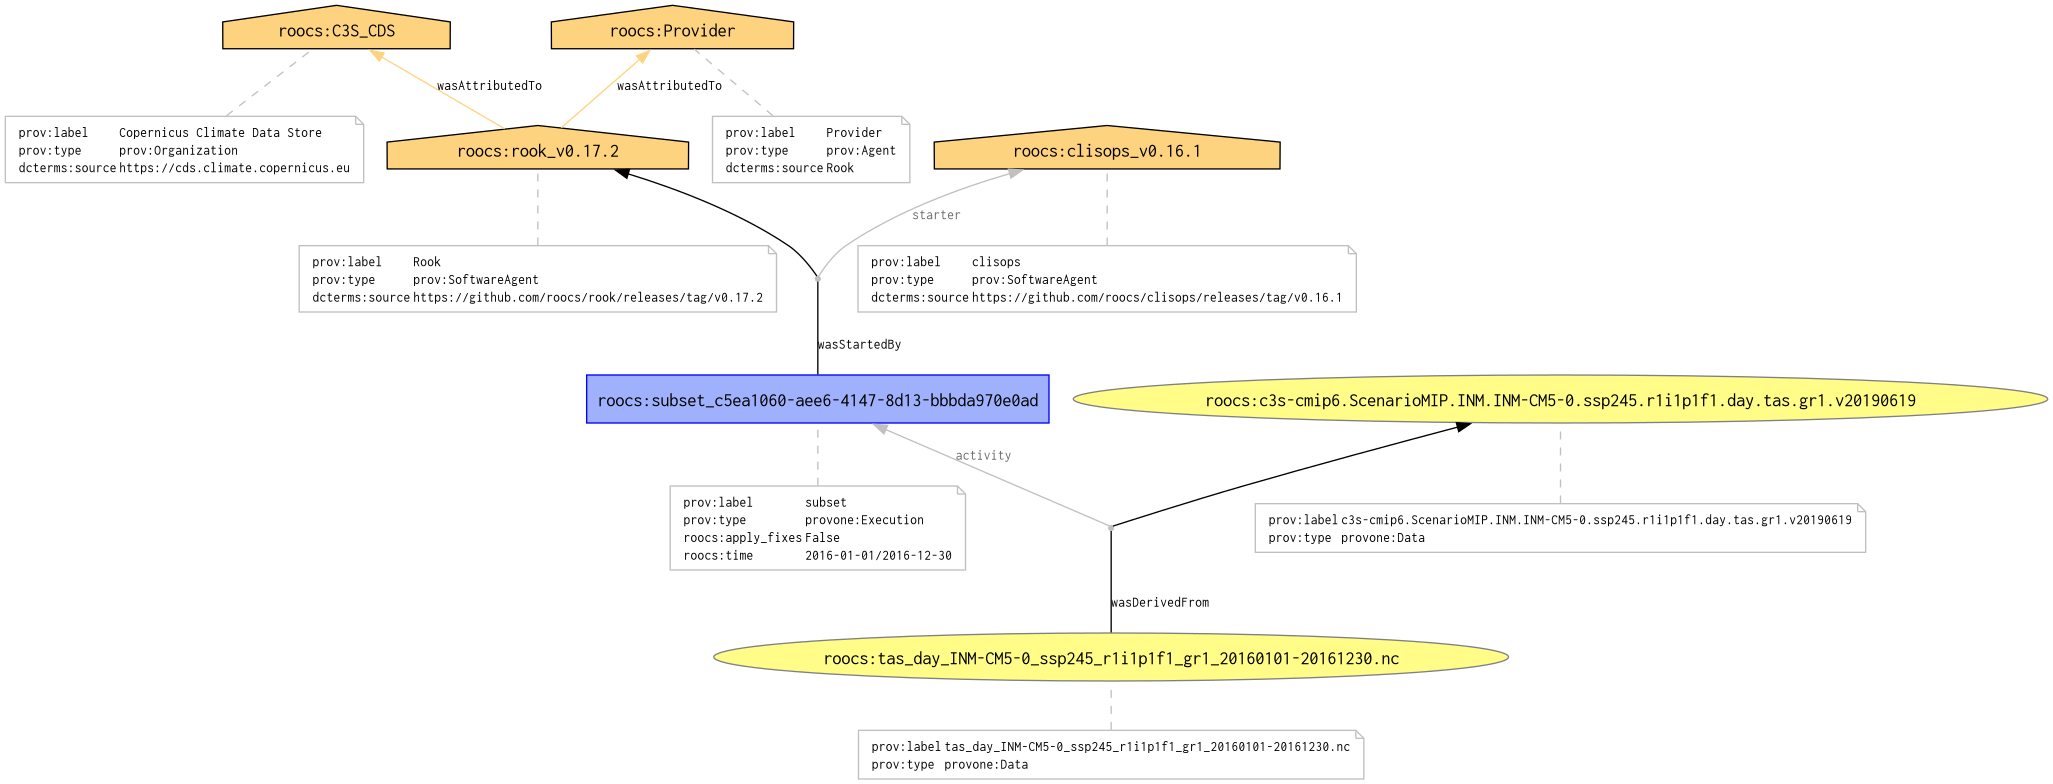

In [5]:
from IPython.display import Image
Image(resp.provenance_image())

## subset by time series

Use *exact* time points

In [6]:
resp = rooki.subset(
    collection='c3s-cmip6.ScenarioMIP.INM.INM-CM5-0.ssp245.r1i1p1f1.day.tas.gr1.v20190619',
    time='2016-01-01T12:00:00, 2016-02-01T12:00:00, 2016-03-01T12:00:00',
)
resp.ok

True

In [7]:
ds = resp.datasets()[0]
ds

<xarray.Dataset> Size: 266kB
Dimensions:    (time: 3, bnds: 2, lat: 120, lon: 180)
Coordinates:
  * time       (time) object 24B 2016-01-01 12:00:00 ... 2016-03-01 12:00:00
  * lat        (lat) float64 960B -89.25 -87.75 -86.25 ... 86.25 87.75 89.25
  * lon        (lon) float64 1kB 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 48B ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    tas        (time, lat, lon) float32 259kB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    branch_time_in_parent:  60225.0
    contact:                Evgeny Volodin (volodinev@gmail.com)
    ...                     ...
    title:                  INM-CM5-0 output prepared for CMIP6
    tracking_id:            hdl:21.14100/89cab4a2-c867-4bb5-a215-622f969cd844
    variable_id:            tas
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by Lawrence Livermore P...
    cmor_version:           3.4.0

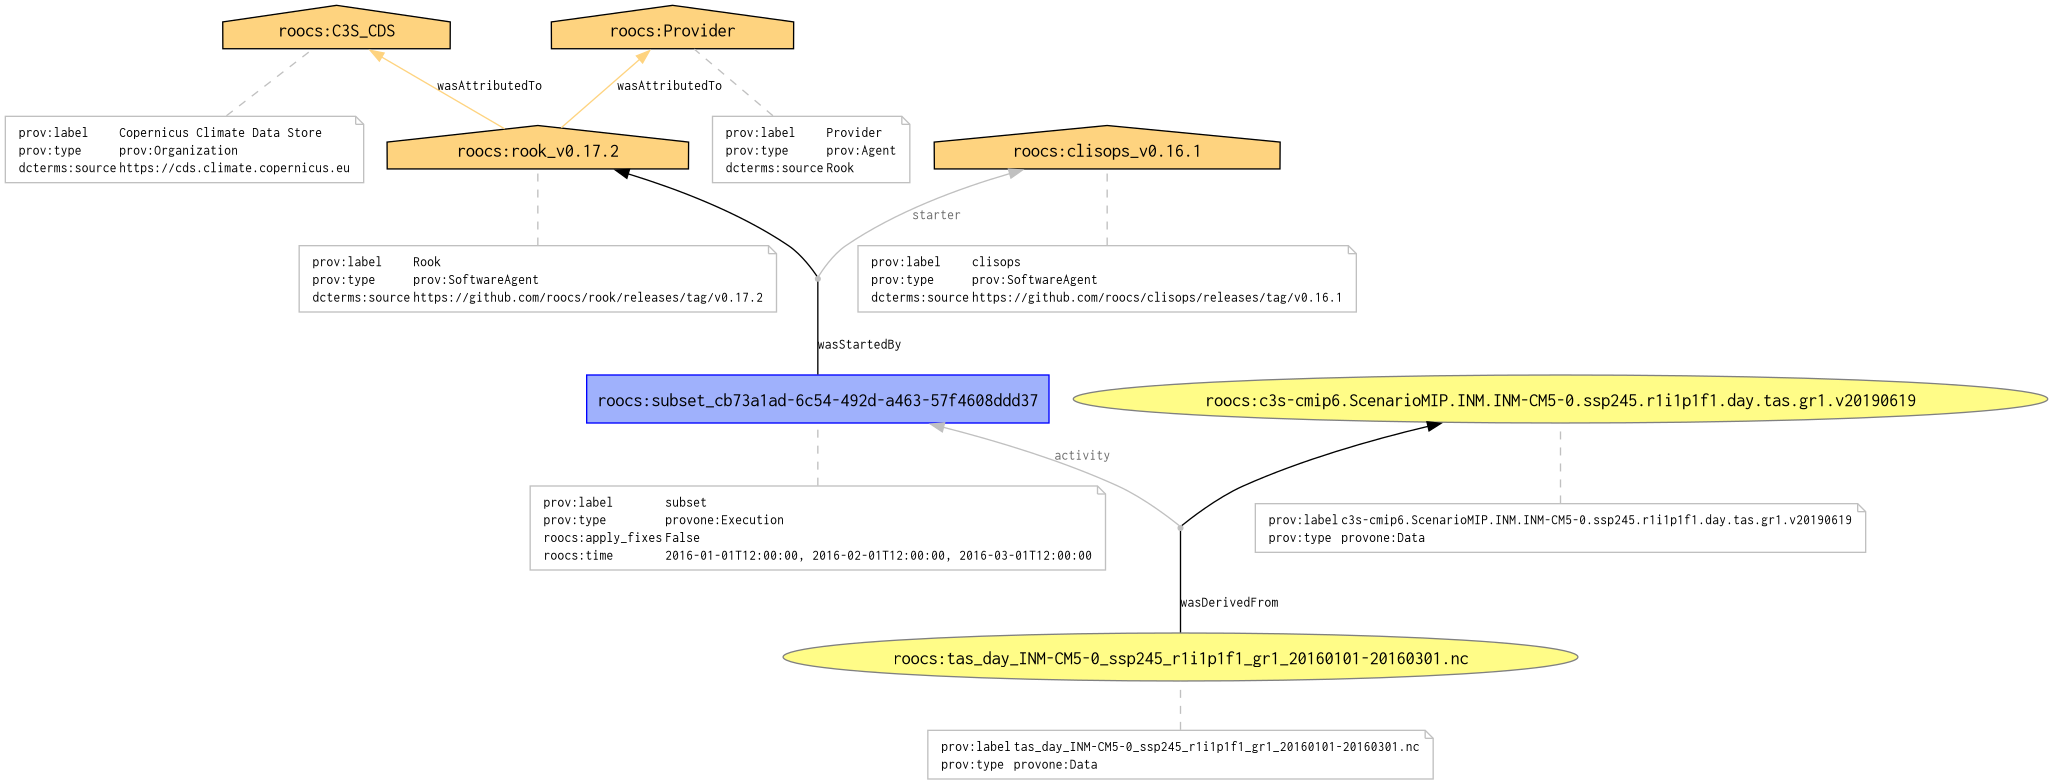

In [8]:
from IPython.display import Image
Image(resp.provenance_image())

## subset by time components

TODO: use `time` parameter for pre-selection

In [9]:
resp = rooki.subset(
    collection='c3s-cmip6.ScenarioMIP.INM.INM-CM5-0.ssp245.r1i1p1f1.day.tas.gr1.v20190619',
    time='2016/2020',
    time_components='year:2016,2017|month:jan,feb,mar|day:01',
)
resp.ok

True

In [10]:
ds = resp.datasets()[0]
ds

<xarray.Dataset> Size: 526kB
Dimensions:    (time: 6, bnds: 2, lat: 120, lon: 180)
Coordinates:
  * time       (time) object 48B 2016-01-01 12:00:00 ... 2017-03-01 12:00:00
  * lat        (lat) float64 960B -89.25 -87.75 -86.25 ... 86.25 87.75 89.25
  * lon        (lon) float64 1kB 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 96B ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    tas        (time, lat, lon) float32 518kB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    branch_time_in_parent:  60225.0
    contact:                Evgeny Volodin (volodinev@gmail.com)
    ...                     ...
    title:                  INM-CM5-0 output prepared for CMIP6
    tracking_id:            hdl:21.14100/89cab4a2-c867-4bb5-a215-622f969cd844
    variable_id:            tas
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by Lawrence Livermore P...
    cmor_version:           3.4.0

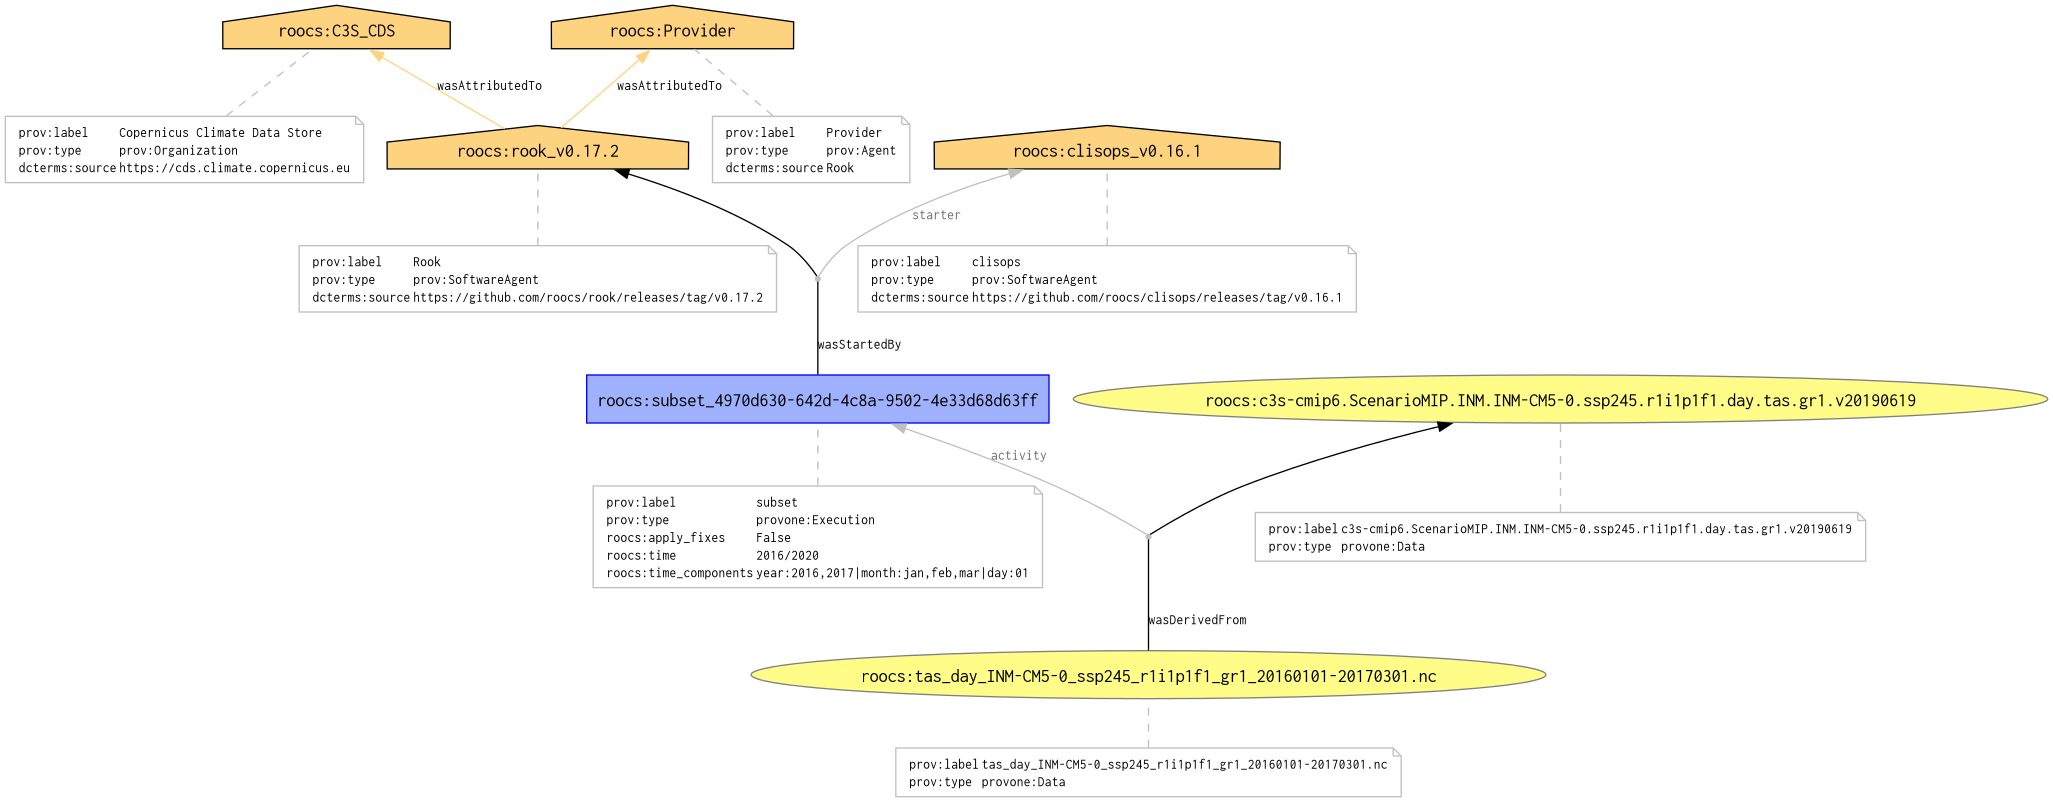

In [11]:
from IPython.display import Image
Image(resp.provenance_image())

## use workflow

In [12]:
from rooki import operators as ops

In [13]:
wf = ops.Subset(
        ops.Input(
            'tas', ['c3s-cmip6.ScenarioMIP.INM.INM-CM5-0.ssp245.r1i1p1f1.day.tas.gr1.v20190619']
        ),
        time="2016/2020",
        time_components="month:jan,feb,mar|day:01"
)

In [14]:
resp = wf.orchestrate()
resp.ok

True

In [15]:
ds = resp.datasets()[0]
ds

<xarray.Dataset> Size: 1MB
Dimensions:    (time: 15, bnds: 2, lat: 120, lon: 180)
Coordinates:
  * time       (time) object 120B 2016-01-01 12:00:00 ... 2020-03-01 12:00:00
  * lat        (lat) float64 960B -89.25 -87.75 -86.25 ... 86.25 87.75 89.25
  * lon        (lon) float64 1kB 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 240B ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    tas        (time, lat, lon) float32 1MB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    branch_time_in_parent:  60225.0
    contact:                Evgeny Volodin (volodinev@gmail.com)
    ...                     ...
    title:                  INM-CM5-0 output prepared for CMIP6
    tracking_id:            hdl:21.14100/89cab4a2-c867-4bb5-a215-622f969cd844
    variable_id:            tas
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by Lawrence Livermore P...
    cmor_version:           3.4.0

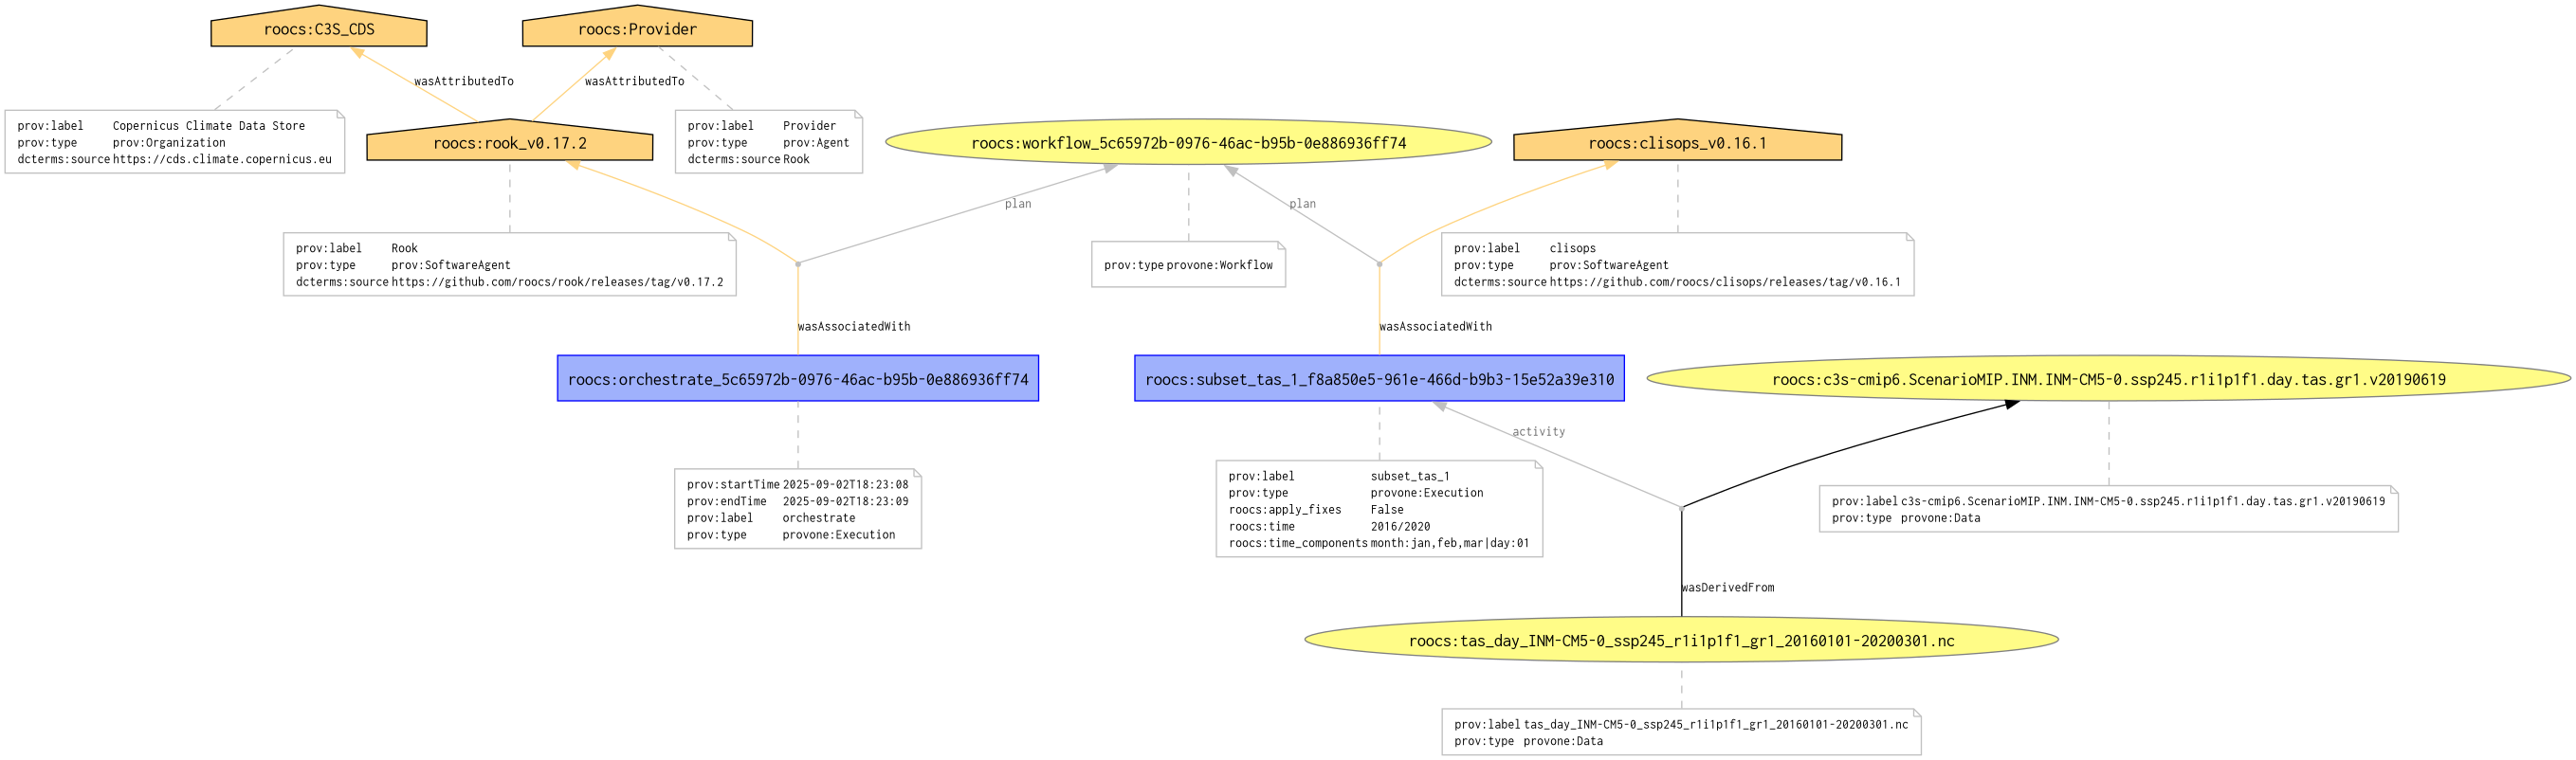

In [16]:
from IPython.display import Image
Image(resp.provenance_image())